In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("data/data_article.csv")

In [8]:
df.sort_values(by="DATE")

,Unnamed: 0,URL,TITRE,IDinDB,TYPE,RESUME,ARTICLE,DATE
250,250,https://www.millenaire3.com/ressources/en-pass...,En passant par le centre : la rue de la Républ...,17077,Étude,"Au plus fort des débats sur la ""dégradation"" d...",Sommaire Chapitre I : De la flânerie1. Qui va...,01/01/1990
872,872,https://www.millenaire3.com/ressources/essai-s...,"Essai sur la mémoire, les attitudes et les rêv...",35407,Texte,Cette contribution engagée donne le point de v...,,01/01/1998
848,848,https://www.millenaire3.com/ressources/la-repu...,La République contre la ville : essai sur l’av...,29316,Texte,Article consacré au renouvellement des régulat...,,01/01/1998
847,847,https://www.millenaire3.com/ressources/essai-s...,Essai sur l'avenir de la France urbaine : la n...,29357,Article,NaN,La société contemporaine n’est-elle pas en tra...,01/01/1998
2730,2730,https://www.millenaire3.com/ressources/lyon-to...,Lyon / Topographie d’une mémoire chrétienne,31680,Texte,Synthèse du texte publié en janvier 1987 par G...,Le texte porte sur la personnalité religieuse ...,01/01/1998
...,...,...,...,...,...,...,...,...
3161,3161,https://www.millenaire3.com/dossiers/2009/demo...,La concertation dans la conduite de projet : G...,481492,Étude,Ce guide méthodologique a été conçu comme un o...,Sommaire : Edito / PréambulePartie 1 : Les fon...,31/12/2007
1611,1611,https://www.millenaire3.com/dossiers/VILLE-ET-...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
1624,1624,https://www.millenaire3.com/dossiers/2011/vill...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
3589,3589,https://www.millenaire3.com/dossiers/2015/m3-s...,M3 Société urbaine et action publique - N°4,485612,Étude,La revue M3 – société urbaine et action publiq...,Sommaire du n°4 : Grand entretien ■ François...,31/12/2012


In [9]:
df.DATE = pd.to_datetime(df.DATE)

<AxesSubplot:>

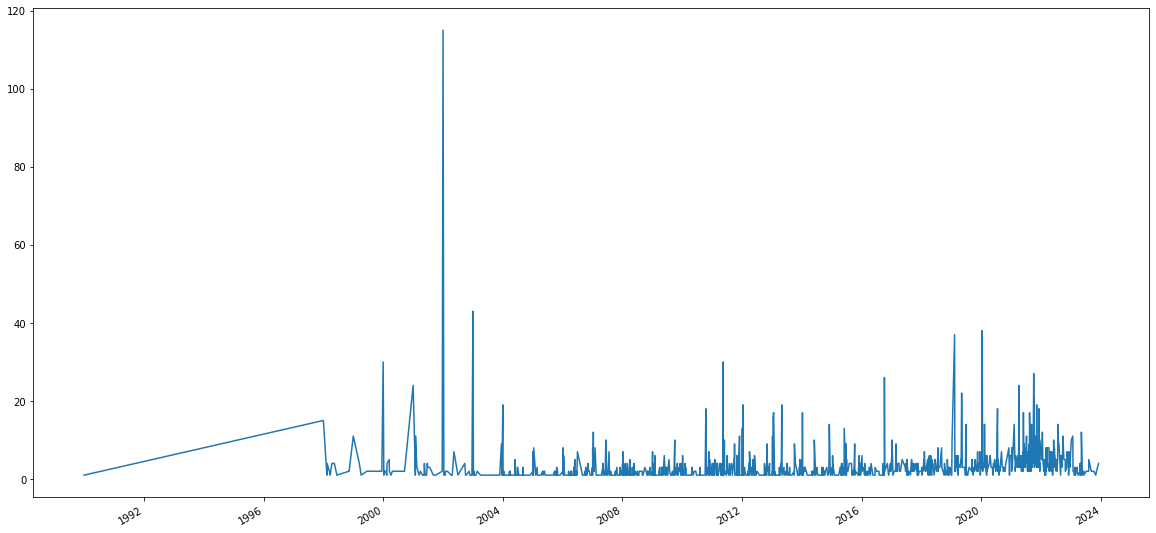

In [10]:
df.DATE.value_counts().plot(figsize=(20,10))

<AxesSubplot:>

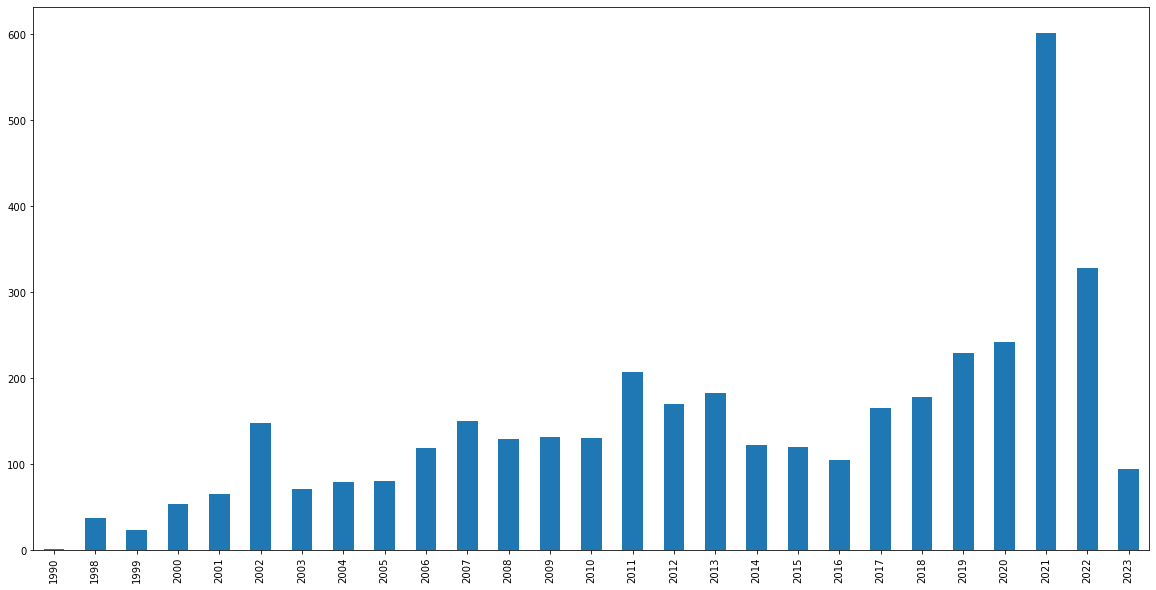

In [11]:
tmp = [date.date().year for date in df.DATE]
tmp = pd.DataFrame({"DATE" : tmp})
tmp.DATE.value_counts().sort_index().plot(kind = "bar", figsize=(20, 10))

### TEXTE


In [32]:

errors = []
for i in range(df.shape[0]):
    if type(df.loc[i, "RESUME"]) != str and type(df.loc[i, "ARTICLE"]) != str:
        errors.append(df.URL[i])

print(len(errors))
for i, item in enumerate(errors): 
    print(i, item)

0


In [31]:
df.loc[df.URL == "https://www.millenaire3.com/ressources/label-ville-internet-2000.-une-mesure-de-la-vitalite-des-collectivites-dans-le-developpement-de-l-internet-citoyen",]

,Unnamed: 0,URL,TITRE,IDinDB,TYPE,RESUME,ARTICLE,DATE
839,839,https://www.millenaire3.com/ressources/label-v...,Label ville Internet 2000. Une mesure de la vi...,26639,Texte,NaN,L’opération « Label villes Internet » soutenue...,2000-01-01


In [37]:
concat = []
for i in range(df.shape[0]):
    texte = ""
    if type(df.loc[i, "RESUME"]) == str:
        texte = df.loc[i, "RESUME"].replace("\n", " ")
    if type(df.loc[i, "ARTICLE"]) == str:
        texte += " "+df.loc[i, "ARTICLE"].replace("\n", " ")
    concat.append(texte)

print(len(df))
print(len(concat))

3971
3971


In [54]:
df2 = df.loc[df.TITRE.duplicated() != True,].sort_values(by="IDinDB")
dfnotna = df2.loc[df2.IDinDB.notna()]
print(f"No NA : {dfnotna.shape}\nWith NA : {df2.shape}")

No NA : (1109, 8)
With NA : (2228, 8)


In [55]:
import spacy
#import openai #!pip install openai
# Il faut aller chercher le token de openai pour utiliser leur API
# L'idée est de constituer un résumé pour chacun des documents et utiliser un moteur de recherche par mot clé sur les textes ?
# Ou sinon uniquement par tag ?

#nlp = spacy.load("...")